In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
def std_1(data, skip_first=False):
    data = data.copy()
    cols = data.columns[1:] if skip_first else data.columns
    data[cols] /= max(data.max())
    return data

In [3]:
def std_2(data, skip_first=False):
    data = data.copy()
    cols = data.columns[1:] if skip_first else data.columns
    data[cols] = (data[cols] - data.mean()) / (max(data.max()) - min(data.min()))
    return data

In [4]:
def std_3(data, skip_first=False):
    data = data.copy()
    cols = data.columns[1:] if skip_first else data.columns
    data[cols] = (data[cols] - data.mean()) / np.sqrt(data.var())
    return data

In [5]:
def read_df(path):
    with open(path, 'r') as f:
        data = [list(map(float, (row.strip().split(',')))) for row in f.readlines()]
    return pd.DataFrame(data, columns=[f'Col {i}' for i in range(len(data[0]))])

In [6]:
data_1 = read_df('/home/roman/Документы/ВУЗ/6-ой семестр/Введение в ИИ/Practice(6)/dt1.txt')
data_2 = read_df('/home/roman/Документы/ВУЗ/6-ой семестр/Введение в ИИ/Practice(6)/dt2.txt')

In [7]:
res = pd.concat(
    [
        data_1.describe().T,
        std_1(data_1).describe().T,
        std_2(data_1).describe().T,
        std_3(data_1).describe().T
    ],
    axis=0
)

res.index = [
    'Col(0)(orig)', 'Col(1)(orig)',
    'Col(0) std_1(max)', 'Col(1) std_1(max)',
    'Col(0) std_2(mean-quant)', 'Col(1) std_2(mean-quant)',
    'Col(0) std_3(standard)', 'Col(1) std_3(standard)'
]

res

,count,mean,std,min,25%,50%,75%,max
Col(0)(orig),97.0,8.159800e+00,3.869884,5.026900,5.707700,6.589400,8.578100,22.203000
Col(1)(orig),97.0,5.839135e+00,5.510262,-2.680700,1.986900,4.562300,7.046700,24.147000
Col(0) std_1(max),97.0,3.379219e-01,0.160264,0.208179,0.236373,0.272887,0.355245,0.919493
Col(1) std_1(max),97.0,2.418162e-01,0.228197,-0.111016,0.082284,0.188939,0.291825,1.000000
Col(0) std_2(mean-quant),97.0,4.478090e-17,0.144250,-0.116779,-0.091402,-0.058537,0.015592,0.523459
Col(1) std_2(mean-quant),97.0,-3.347837e-17,0.205395,-0.317576,-0.143592,-0.047594,0.045012,0.682424
Col(0) std_3(standard),97.0,3.010192e-16,1.000000,-0.809559,-0.633637,-0.405800,0.108091,3.628843
Col(1) std_3(standard),97.0,-1.808405e-16,1.000000,-1.546176,-0.699102,-0.231719,0.219148,3.322503


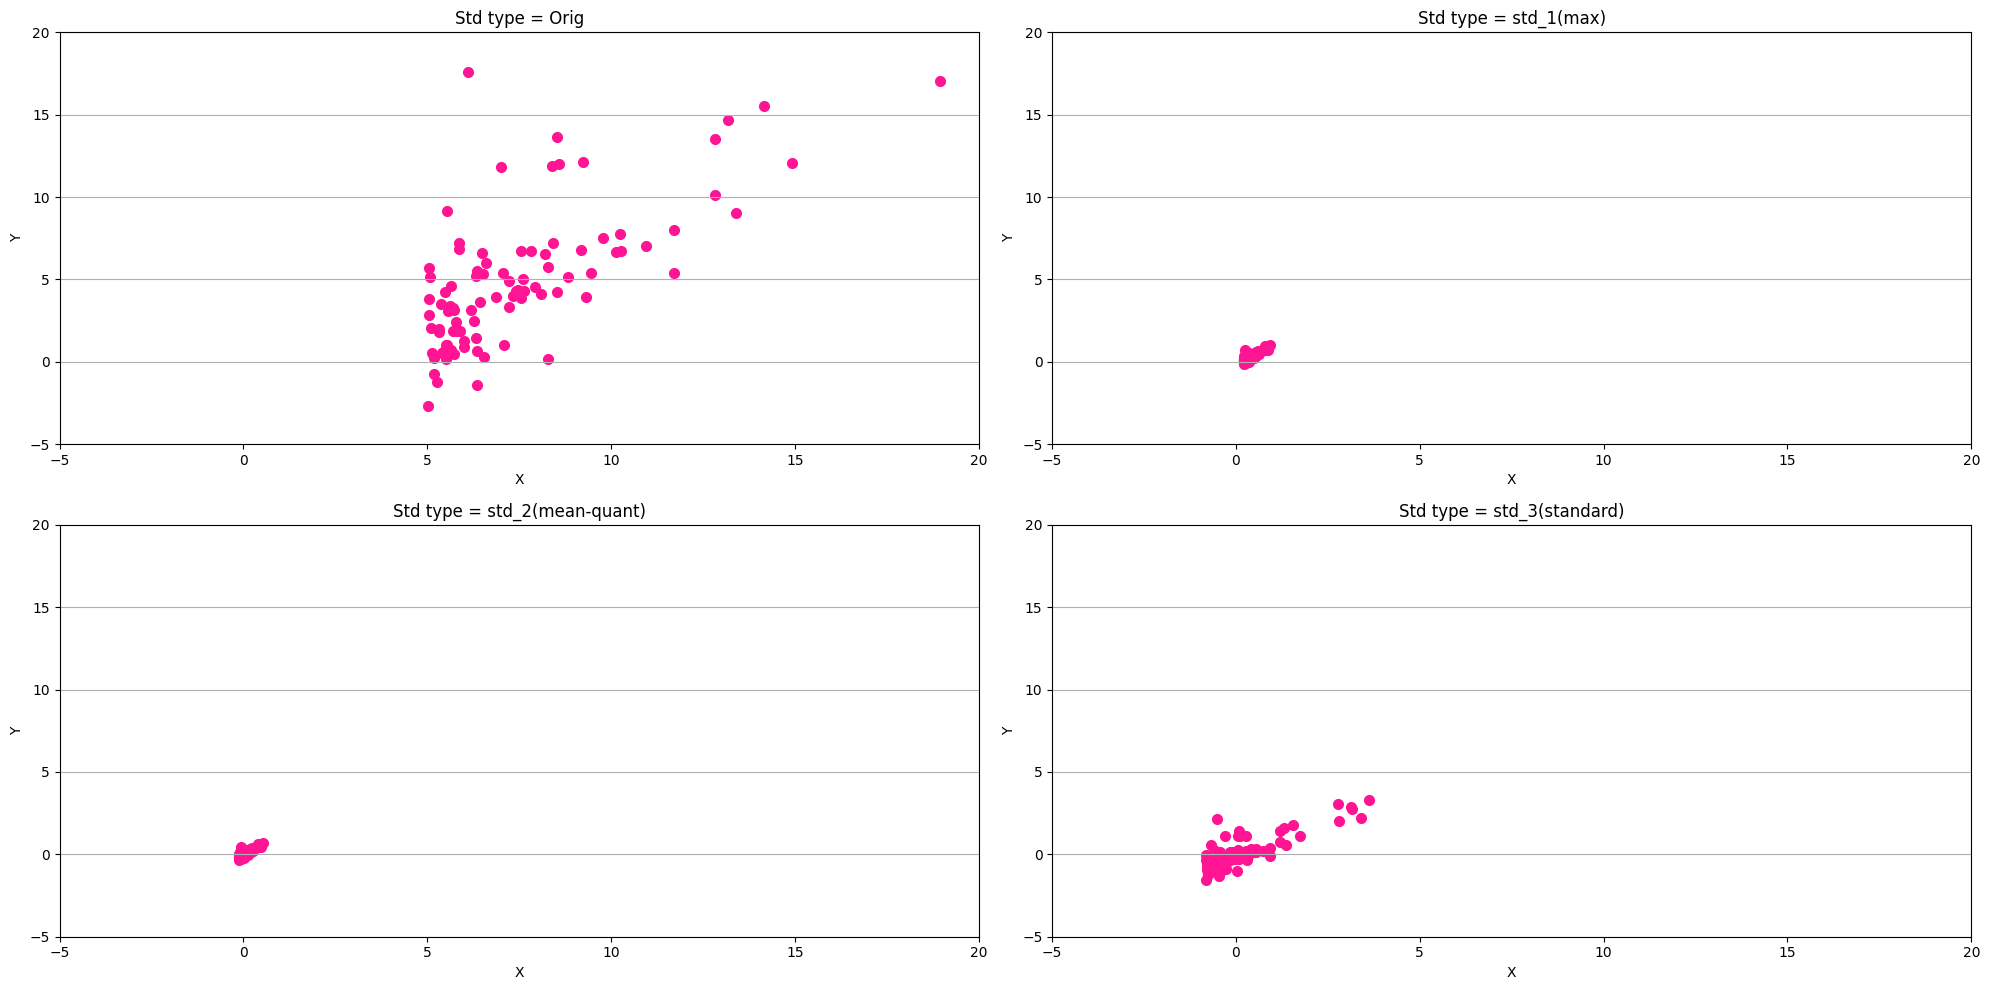

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax = ax.ravel()  # преобразуем в плоский массив для удобства

data = [
    (data_1, 'Orig'),
    (std_1(data_1), 'std_1(max)'),
    (std_2(data_1), 'std_2(mean-quant)'),
    (std_3(data_1), 'std_3(standard)')
]

col_1, col_2 = 'Col 0', 'Col 1'

for dt, ax_i in zip(data, ax):
    
    ax_i.scatter(dt[0][col_1], dt[0][col_2], color='deeppink', lw=2)

    ax_i.set_xlim([-5, 20])
    ax_i.set_ylim([-5, 20])
    ax_i.set_xlabel('X')
    ax_i.set_ylabel('Y')
    ax_i.set_title(f'Std type = {dt[1]}')
    ax_i.grid(True, axis='y')

plt.tight_layout()
plt.show()

In [9]:
res_3d = pd.concat(
    [
        data_2.describe().T,
        std_1(data_2).describe().T,
        std_2(data_2).describe().T,
        std_3(data_2).describe().T
    ],
    axis=0
)

res_3d.index = [
    'Col(0)(orig)', 'Col(1)(orig)', 'Col(2)(orig)',
    'Col(0) std_1(max)', 'Col(1) std_1(max)', 'Col(2) std_1(max)',
    'Col(0) std_2(mean-quant)', 'Col(1) std_2(mean-quant)', 'Col(2) std_2(mean-quant)',
    'Col(0) std_3(standard)', 'Col(1) std_3(standard)', 'Col(2) std_3(standard)'
]

res_3d

,count,mean,std,min,25%,50%,75%,max
Col(0)(orig),47.0,2.000681e+03,794.702354,852.000000,1.432000e+03,1.888000e+03,2269.000000,4478.000000
Col(1)(orig),47.0,3.170213e+00,0.760982,1.000000,3.000000e+00,3.000000e+00,4.000000,5.000000
Col(2)(orig),47.0,3.404127e+05,125039.899586,169900.000000,2.499000e+05,2.999000e+05,384450.000000,699900.000000
Col(0) std_1(max),47.0,2.858524e-03,0.001135,0.001217,2.046007e-03,2.697528e-03,0.003242,0.006398
Col(1) std_1(max),47.0,4.529522e-06,0.000001,0.000001,4.286327e-06,4.286327e-06,0.000006,0.000007
Col(2) std_1(max),47.0,4.863733e-01,0.178654,0.242749,3.570510e-01,4.284898e-01,0.549293,1.000000
Col(0) std_2(mean-quant),47.0,3.229538e-20,0.001135,-0.001641,-8.125185e-04,-1.609959e-04,0.000383,0.003540
Col(1) std_2(mean-quant),47.0,2.759615e-22,0.000001,-0.000003,-2.431962e-07,-2.431962e-07,0.000001,0.000003
Col(2) std_2(mean-quant),47.0,-1.712578e-17,0.178654,-0.243625,-1.293225e-01,-5.788358e-02,0.062920,0.513627
Col(0) std_3(standard),47.0,3.779483e-17,1.000000,-1.445423,-7.155897e-01,-1.417900e-01,0.337635,3.117292


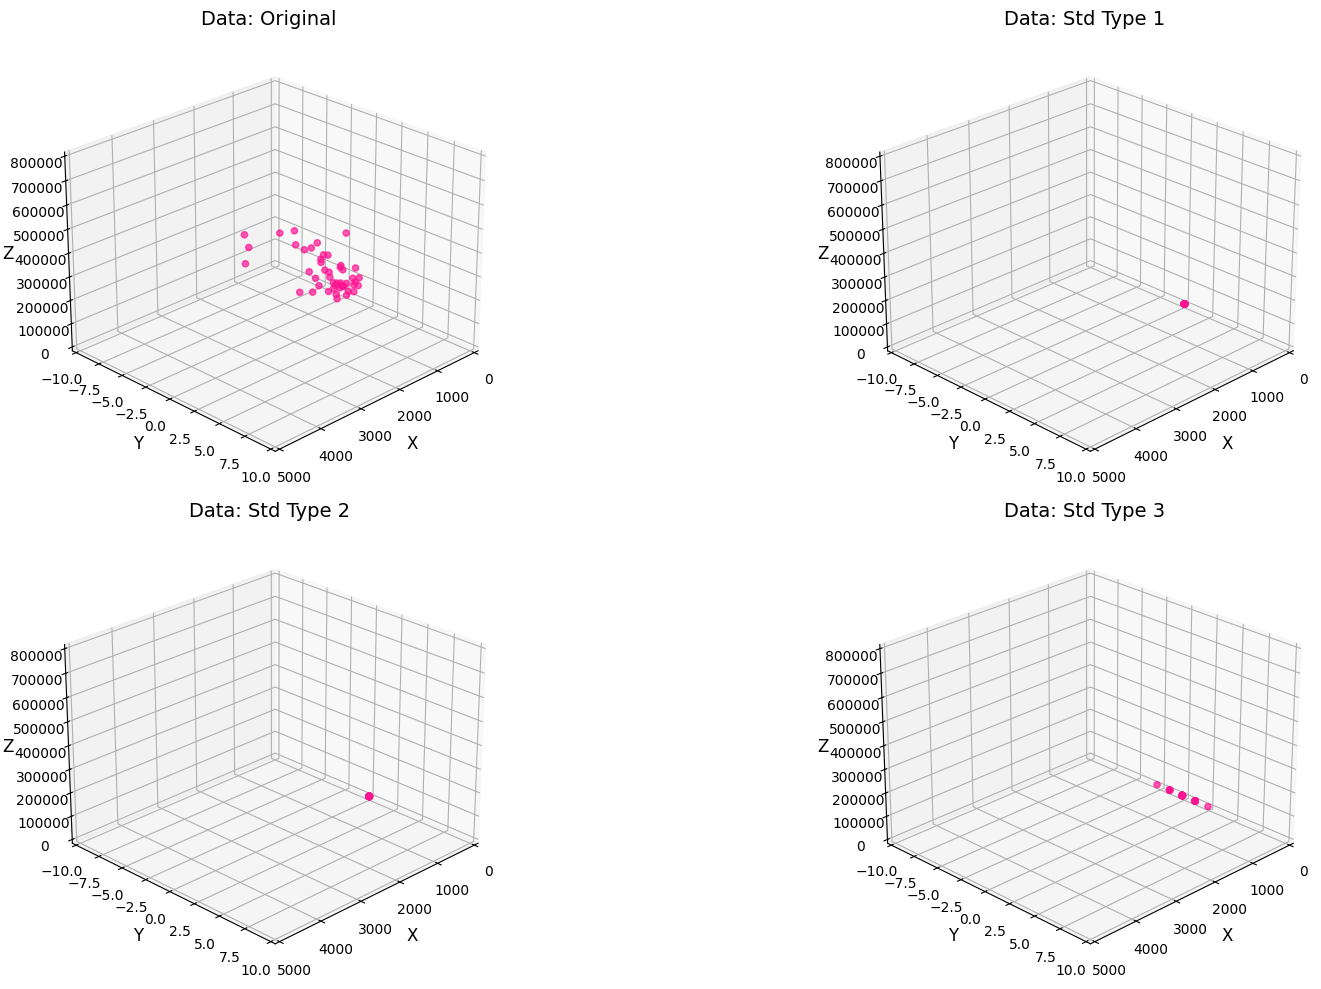

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10), subplot_kw={'projection': '3d'})
ax = ax.ravel()  # преобразуем в плоский массив для удобства

data = [
    (data_2, 'Original'),
    (std_1(data_2), 'Std Type 1'),
    (std_2(data_2), 'Std Type 2'),
    (std_3(data_2), 'Std Type 3')
]

elev = 25
azim = 45

for dt, ax_i in zip(data, ax):
    
    scatter = ax_i.scatter(
        dt[0]['Col 0'], dt[0]['Col 1'], dt[0]['Col 2'],
        alpha=0.7,
        color='deeppink'
    )
    
    ax_i.view_init(elev=elev, azim=azim)
    
    ax_i.set_xlabel('X', fontsize=12)
    ax_i.set_ylabel('Y', fontsize=12)
    ax_i.set_zlabel('Z', fontsize=12)
    ax_i.set_title(f'Data: {dt[1]}', fontsize=14)
    
    ax_i.grid(True, alpha=0.5)
    ax_i.set_xlim([0, 5000])
    ax_i.set_ylim([-10, 10])
    ax_i.set_zlim([0, 800000])

plt.tight_layout()
plt.show()